## 梯度检验
欢迎来到本周的最后作业！在本作业中，你将学习实现和使用梯度检验。

假设你是致力于在全球范围内提供移动支付的团队的一员，被上级要求建立深度学习模型来检测欺诈行为--每当有人进行支付时，你都应该确认该支付是否可能是欺诈性的，例如用户的帐户已被黑客入侵。

但是模型的反向传播很难实现，有时还会有错误。因为这是关键的应用任务，所以你公司的CEO要反复确定反向传播的实现是正确的。CEO要求你证明你的反向传播实际上是有效的！为了保证这一点，你将应用到“梯度检验”。

让我们开始做吧！



In [ ]:
cd ../input/deeplearning34288 # 当前目录正常的话，就不需要此步

In [1]:
# Packages
import numpy as np
from testCases import *
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector

### 1 梯度检验原理
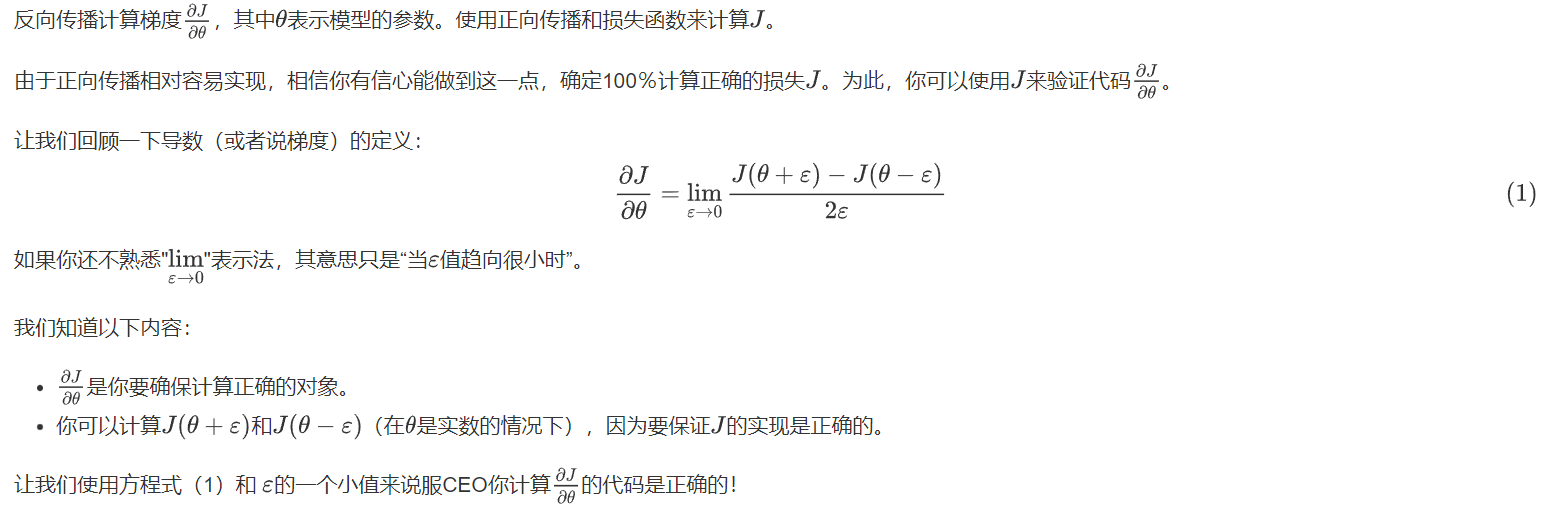


### 2 一维梯度检查
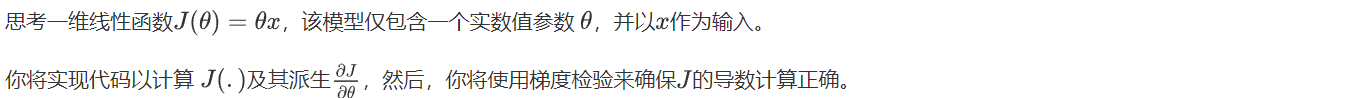

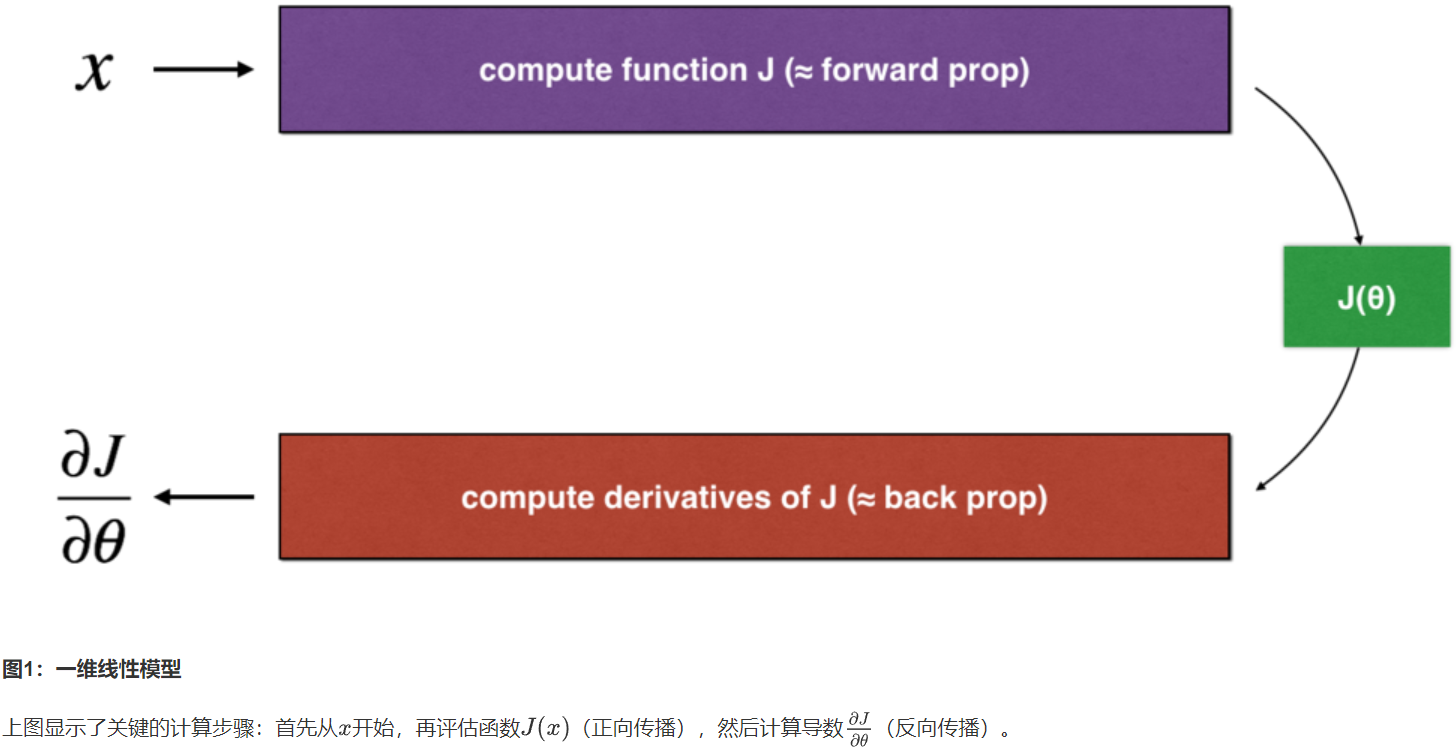

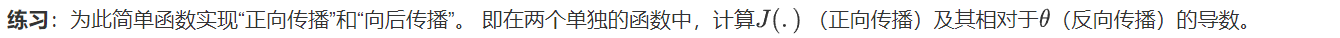



In [2]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(x, theta):
    """
    Implement the linear forward propagation (compute J) presented in Figure 1 (J(theta) = theta * x)
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    J -- the value of function J, computed using the formula J(theta) = theta * x
    """
    
    ### START CODE HERE ### (approx. 1 line)
    J = theta * x
    ### END CODE HERE ###
    
    return J

In [3]:
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))

J = 8


**预期输出**:
J = 8

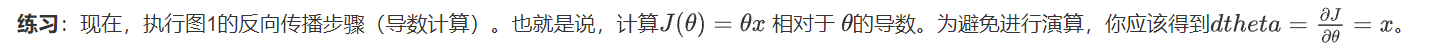

In [4]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(x, theta):
    """
    Computes the derivative of J with respect to theta (see Figure 1).
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    dtheta -- the gradient of the cost with respect to theta
    """
    
    ### START CODE HERE ### (approx. 1 line)
    dtheta = x
    ### END CODE HERE ###

    
    return dtheta

In [5]:
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))

dtheta = 2


**预期输出**:
dtheta = 2



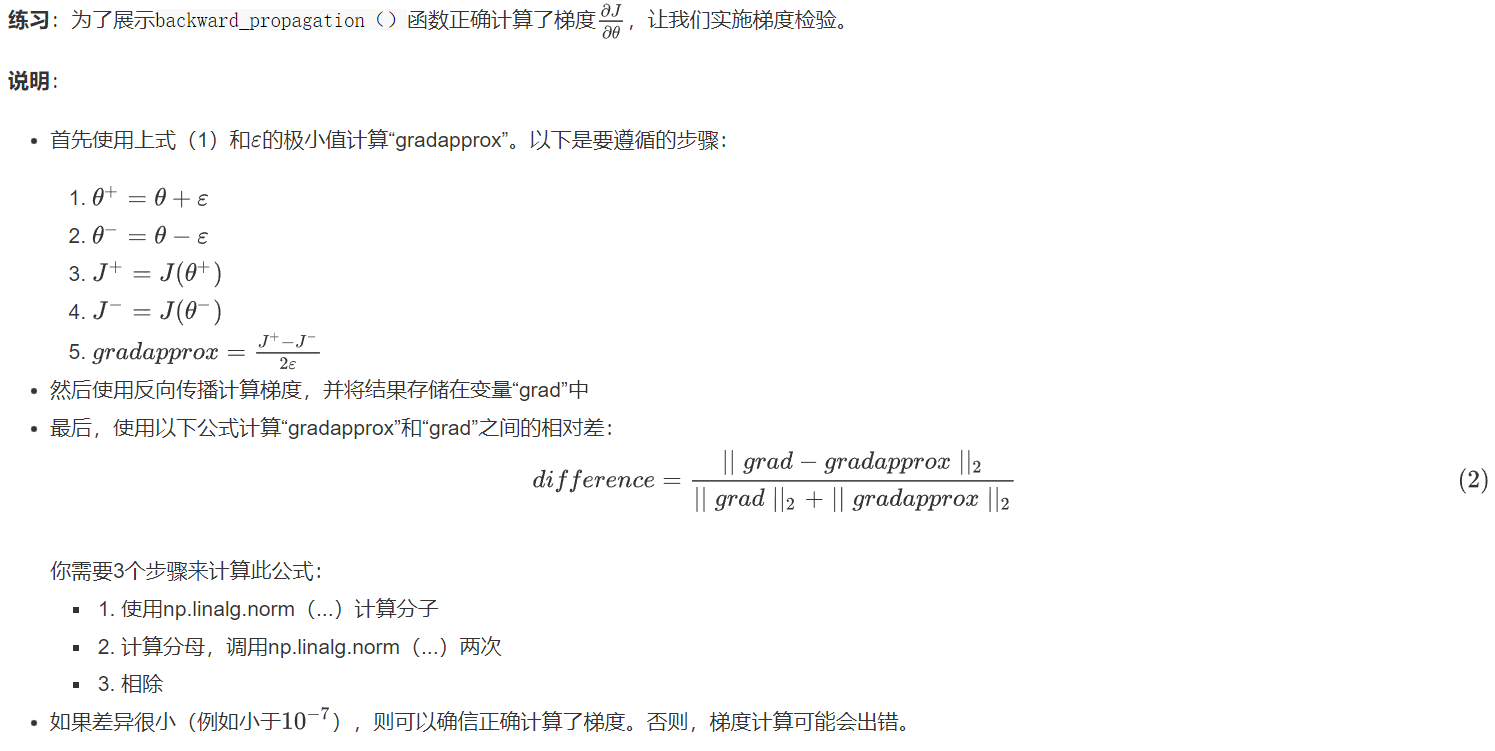

In [6]:
# GRADED FUNCTION: gradient_check

def gradient_check(x, theta, epsilon = 1e-7):
    """
    Implement the backward propagation presented in Figure 1.
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Compute gradapprox using left side of formula (1). epsilon is small enough, you don't need to worry about the limit.
    ### START CODE HERE ### (approx. 5 lines)
    thetaplus = theta + epsilon                               # Step 1
    thetaminus = theta - epsilon                              # Step 2
    J_plus = forward_propagation(x, thetaplus)                                  # Step 3
    J_minus = forward_propagation(x, thetaminus)                                 # Step 4
    gradapprox = (J_plus - J_minus) / (2 * epsilon)                              # Step 5
    ### END CODE HERE ###

    # Check if gradapprox is close enough to the output of backward_propagation()
    ### START CODE HERE ### (approx. 1 line)
    grad = backward_propagation(x, theta)
    ### END CODE HERE ###

    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad - gradapprox)                               # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)                            # Step 2'
    difference = numerator / denominator                              # Step 3'
    ### END CODE HERE ###
    
    if difference < 1e-7:
        print ("The gradient is correct!")
    else:
        print ("The gradient is wrong!")
    
    return difference

In [7]:
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

The gradient is correct!
difference = 2.919335883291695e-10


预期输出:

The gradient is correct!

difference = 2.919335883291695e-10

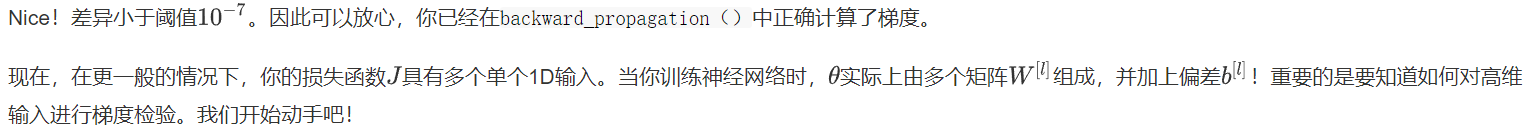

### 3 N维梯度检验
下图描述了欺诈检测模型的正向传播和反向传播：
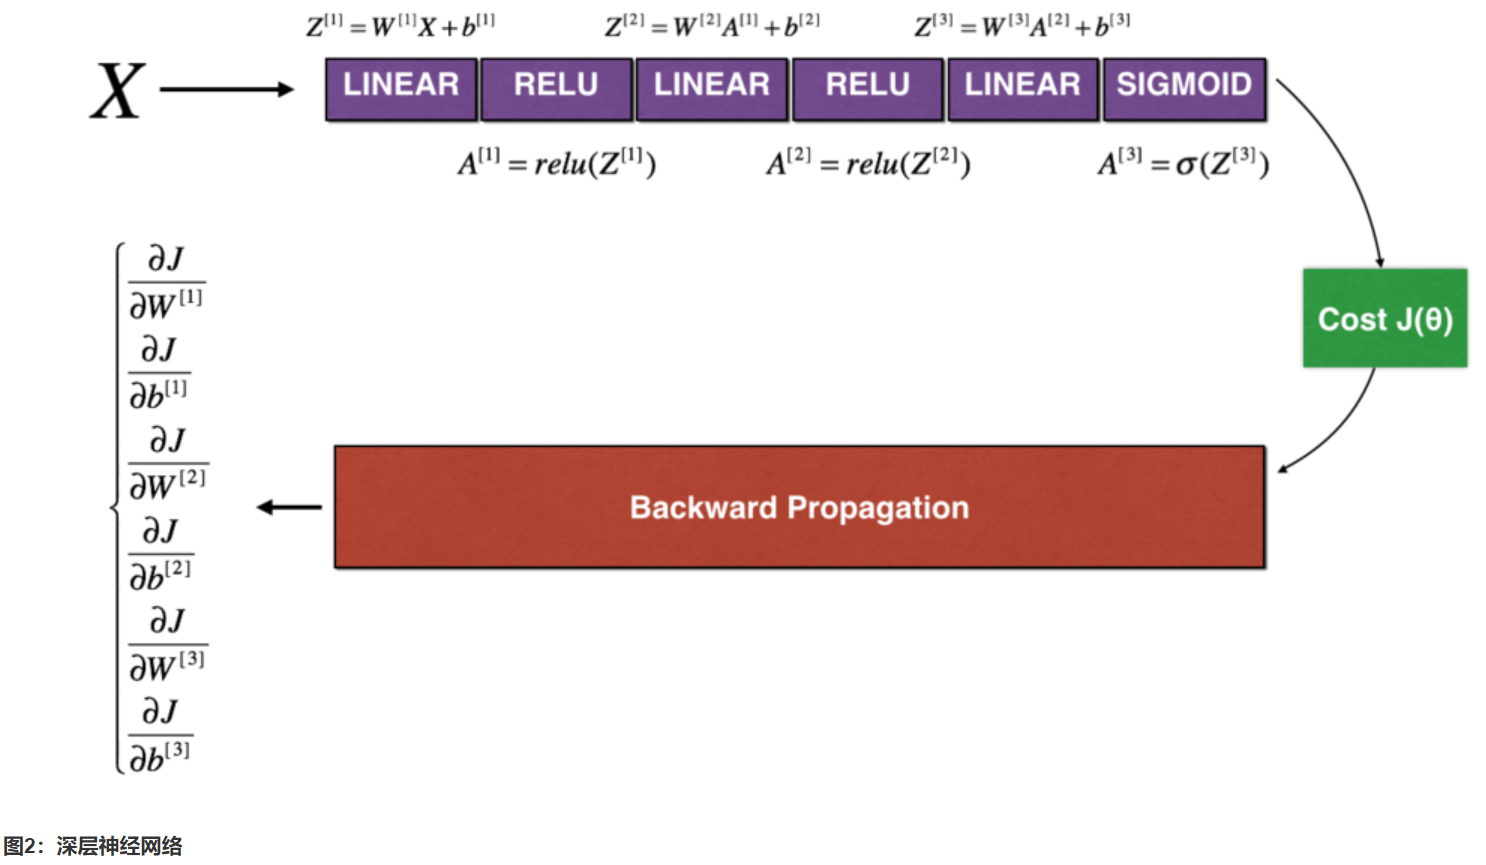


LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID

让我们看一下正向传播和反向传播的实现。

In [22]:
def forward_propagation_n(X, Y, parameters):
    """
    Implements the forward propagation (and computes the cost) presented in Figure 3.
    
    Arguments:
    X -- training set for m examples
    Y -- labels for m examples 
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (5, 4)
                    b1 -- bias vector of shape (5, 1)
                    W2 -- weight matrix of shape (3, 5)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    
    Returns:
    cost -- the cost function (logistic cost for one example)
    """
    
    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

现在，运行反向传播。

In [23]:
def backward_propagation_n(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input datapoint, of shape (input size, 1)
    Y -- true "label"
    cache -- cache output from forward_propagation_n()
    
    Returns:
    gradients -- A dictionary with the gradients of the cost with respect to each parameter, activation and pre-activation variables.
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)  #错误版本为 dW2 = 1./m * np.dot(dZ2, A1.T) * 2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True) # 错误版本为 db1 = 4./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

- 问：我修改完成后，diffrence很接近10^-7，但是还是超过了，这个正常吗？网上没找到关于修改点的答案。
    - 自答：根据本项目另一个作业，可以看到我这修改正确，只是`gradient_check_n`的diif判决要改成`if difference > 1.2e-7:`，这样才能判决通过；所以这里是gradient_check_n的问题。

你在欺诈检测测试集上获得了初步的实验结果，但是这并不是100％确定的模型，毕竟没有东西是完美的！让我们实现梯度检验以验证你的梯度是否正确。

**梯度检验原理**

与1和2中一样，你想将“gradapprox”与通过反向传播计算的梯度进行比较。公式仍然是：

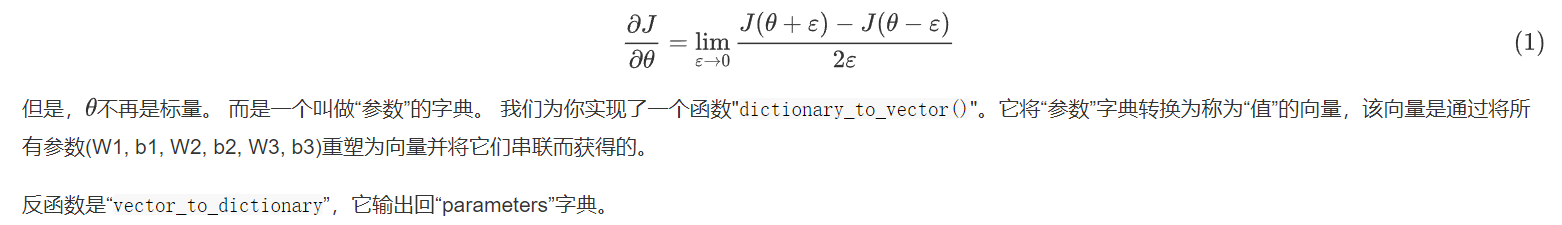

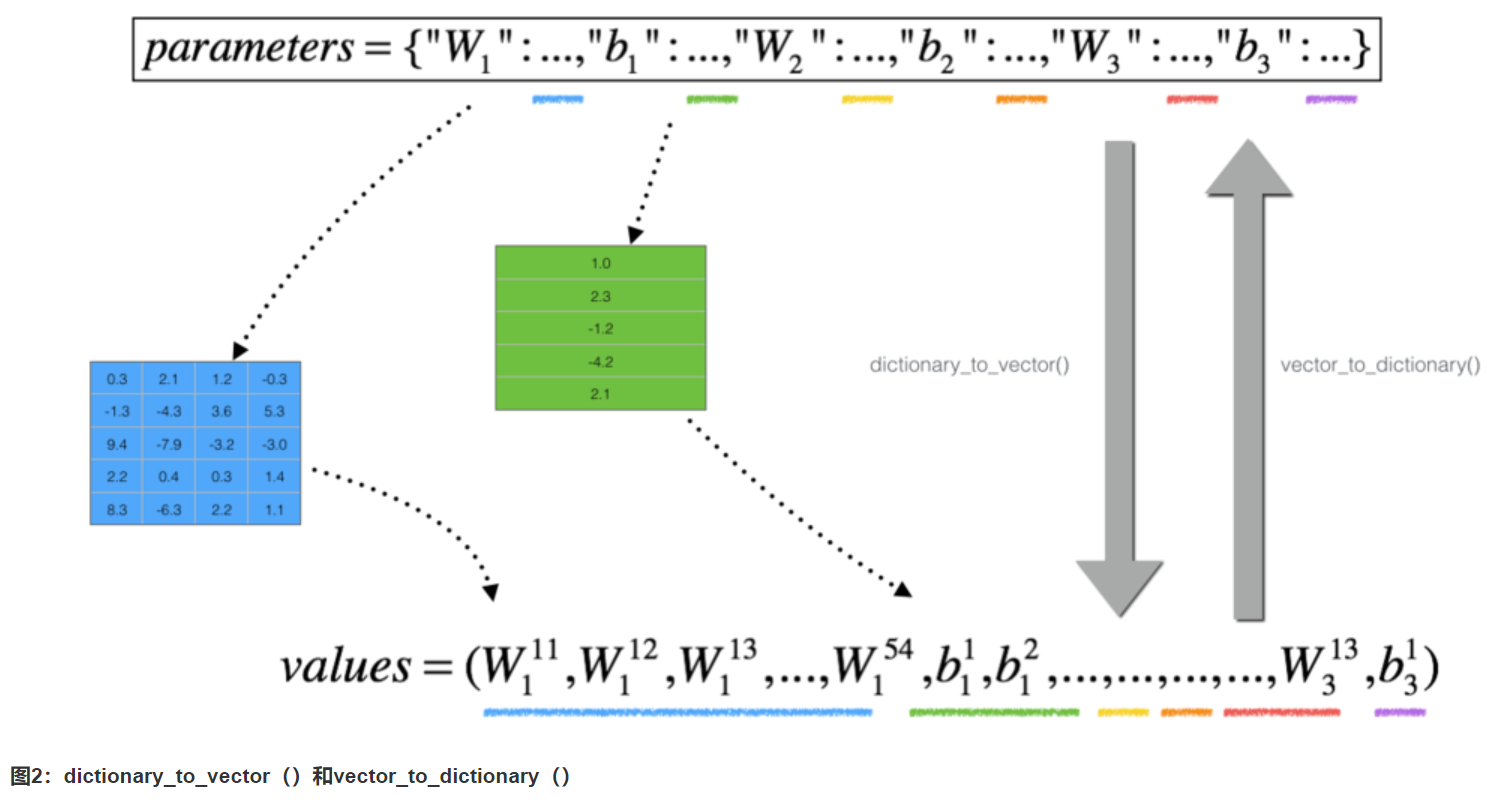

你将在 gradient_check_n()中用到这些函数

我们还使用gradients_to_vector()将“gradients”字典转换为向量“grad”。

**练习**：实现gradient_check_n()。

**说明**：这是伪代码，可帮助你实现梯度检验。

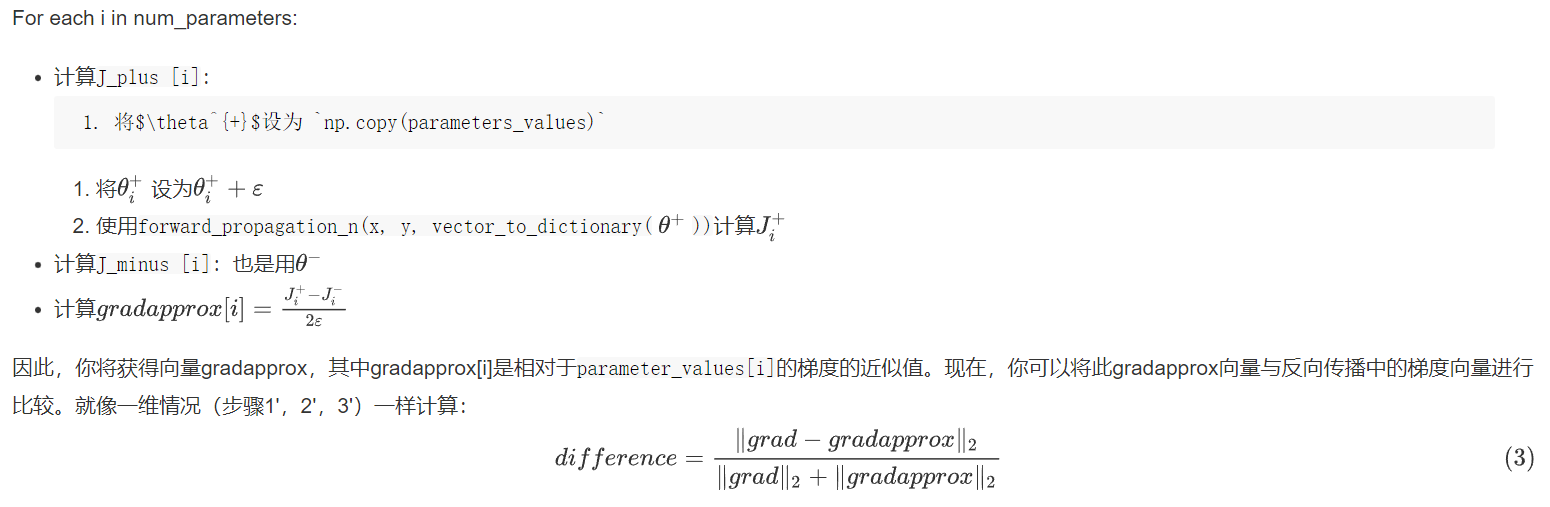

In [24]:
# GRADED FUNCTION: gradient_check_n

def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        ### START CODE HERE ### (approx. 3 lines)
        thetaplus = np.copy(parameters_values)                                      # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon                                # Step 2
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))                                  # Step 3
        ### END CODE HERE ###

        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        ### START CODE HERE ### (approx. 3 lines)
        thetaminus = np.copy(parameters_values)                                     # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon                            # Step 2        
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus))                                  # Step 3
        ### END CODE HERE ###

        # Compute gradapprox[i]
        ### START CODE HERE ### (approx. 1 line)
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2.* epsilon)
        ### END CODE HERE ###

    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad - gradapprox)                                           # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)                                         # Step 2'
    difference = numerator / denominator                                          # Step 3'
    ### END CODE HERE ###

    if difference > 1e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [25]:
X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

There is a mistake in the backward propagation! difference = 1.1890417878779317e-07


**预期输出**:

There is a mistake in the backward propagation! difference = 0.2850931567761624

看起来backward_propagation_n代码似乎有错误！很好，你已经实现了梯度检验。返回到backward_propagation并尝试查找/更正错误（提示：检查dW2和db1）。如果你已解决问题，请重新运行梯度检验。请记住，如果修改代码，则需要重新执行定义backward_propagation_n()的单元格。

你可以进行梯度检验来证明你的导数计算的正确吗？即使作业的这一部分没有评分，我们也强烈建议你尝试查找错误并重新运行梯度检验，直到确信实现了正确的反向传播。

**注意**
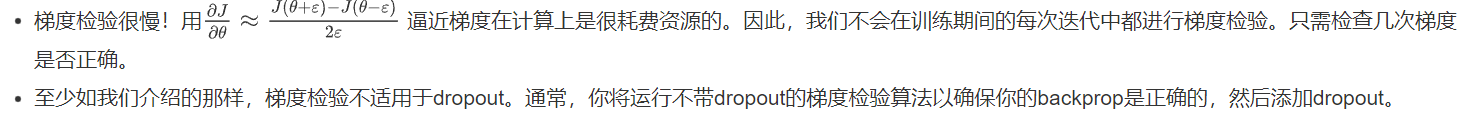

Nice！现在你可以确信你用于欺诈检测的深度学习模型可以正常工作！甚至可以用它来说服你的CEO。 :)

**你在此笔记本中应记住的内容**：
- 梯度检验可验证反向传播的梯度与梯度的数值近似值之间的接近度（使用正向传播进行计算）。
- 梯度检验很慢，因此我们不会在每次训练中都运行它。**通常，你仅需确保其代码正确即可运行它**，然后将其关闭并将backprop用于实际的学习过程。